<a href="https://colab.research.google.com/github/SEDO11/knu_ai/blob/main/step23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                140       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable 

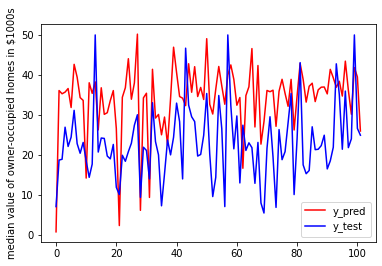

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
# print("x_train.shape=",x_train.shape) # (404, 13)
# print("y_train.shape=",y_train.shape) # (404,)
# print("x_test.shape=", x_test.shape)  # (102, 13)
# print("y_test.shape=", y_test.shape)  # (102,)

model = tf.keras.Sequential()

#1: 1-layer
# model.add(tf.keras.layers.Dense(units=1, input_dim=x_train.shape[1]))# x_train.shape[1]=13

#2:  3-layer
model.add(tf.keras.layers.Dense(units=10, input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mae']) #mean absolute error
ret = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)

train_loss = model.evaluate(x_train, y_train, verbose=2)
test_loss = model.evaluate(x_test, y_test, verbose=2)

# loss = ret.history['loss']
# plt.plot(loss)
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.show()

y_pred = model.predict(x_test)
##print("y_pred:", y_pred)

plt.ylabel("median value of owner-occupied homes in $1000s")
plt.plot(y_pred, "r-", label="y_pred")
plt.plot(y_test, "b-", label="y_test")
plt.legend(loc='best')
plt.show()
